In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scienceplots
from nanonets.utils import prepare_for_fitness_calculation, fitness, abundance, load_boolean_results, nonlinear_parameter, return_ndr, return_nls
%matplotlib inline
plt.style.use(["science","bright", "grid"])

PATH                = "/home/jonasmensing/bagheera/data/1_funding_period/controls/range/"
PATH_SCALED         = "/home/jonasmensing/bagheera/data/1_funding_period/controls/range_scaled/"
V_CONTROL           = [0.01,0.02,0.03,0.04,0.05] # [0.01,0.02,0.03,0.04,0.05]
V_CONTROL_SCALED    = [0.01,0.02]
MAX_ERROR           = 0.1

In [3]:
data, data_scaled = {}, {}

for V in V_CONTROL:
    df      = pd.read_csv(f"{PATH}Nx=9_Ny=9_Ne=8_{V}.csv")
    df      = df[(df['Error']/df['Observable']).abs() < MAX_ERROR].reset_index(drop=True)
    df      = prepare_for_fitness_calculation(df, 8, ["E1","E3"])
    data[V] = df

for V in V_CONTROL_SCALED:
    df              = pd.read_csv(f"{PATH_SCALED}Nx=9_Ny=9_Ne=8_{V}.csv")
    df              = df[(df['Error']/df['Observable']).abs() < MAX_ERROR].reset_index(drop=True)
    df              = prepare_for_fitness_calculation(df, 8, ["E1","E3"])
    data_scaled[V]  = df

data_f          = {V : fitness(data[V],["E1","E3"]) for V in V_CONTROL}
data_f_scaled   = {V : fitness(data_scaled[V],["E1","E3"]) for V in V_CONTROL_SCALED}
data_a          = {V : abundance(data_f[V]) for V in V_CONTROL}
data_a_scaled   = {V : abundance(data_f_scaled[V]) for V in V_CONTROL_SCALED}

In [4]:
fitness_combined = pd.DataFrame()

for V in V_CONTROL:

    # Unscaled
    df_tmp           = data_f[V].loc[:,'AND Fitness':]
    df_tmp.columns   = ['AND','OR','XOR','NAND','NOR','XNOR']
    df_tmp           = df_tmp.melt(var_name='Gate',value_name='Fitness')
    df_tmp['V']      = V
    df_tmp['Scaled'] = False
    fitness_combined = pd.concat([fitness_combined,df_tmp], ignore_index=True)

for V in V_CONTROL_SCALED:
    # Scaled
    df_tmp           = data_f_scaled[V].loc[:,'AND Fitness':]
    df_tmp.columns   = ['AND','OR','XOR','NAND','NOR','XNOR']
    df_tmp           = df_tmp.melt(var_name='Gate',value_name='Fitness')
    df_tmp['V']      = V
    df_tmp['Scaled'] = True
    fitness_combined = pd.concat([fitness_combined,df_tmp], ignore_index=True)

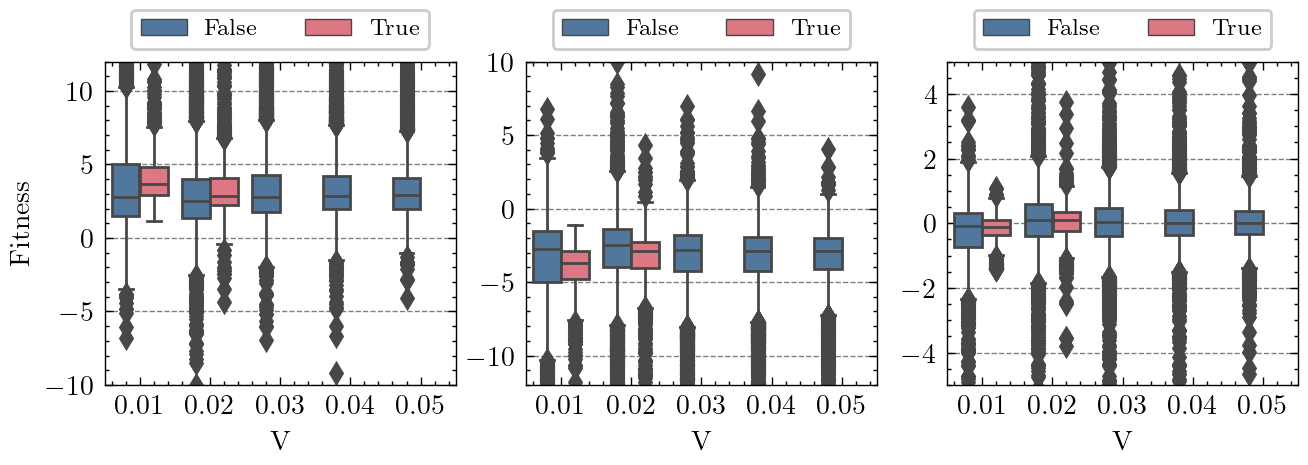

In [5]:
fig = plt.figure(dpi=200)
fig.set_figwidth(fig.get_figwidth()*2.2)
fig.set_figheight(fig.get_figheight()*0.8)

ax  = fig.add_subplot(1,3,1)
ax  = sns.boxplot(data=fitness_combined[fitness_combined['Gate']=='AND'], x='V', y='Fitness', hue='Scaled', ax=ax)
_   = ax.set_ylim(-10,12)
l   = ax.legend(title='', bbox_to_anchor=(0.5,1.1), loc='center', fontsize='small', ncol=2)

ax  = fig.add_subplot(1,3,2)
ax  = sns.boxplot(data=fitness_combined[fitness_combined['Gate']=='NAND'], x='V', y='Fitness', hue='Scaled', ax=ax)
_   = ax.set_ylim(-12,10)
_   = ax.set_ylabel("")
l   = ax.legend(title='', bbox_to_anchor=(0.5,1.1), loc='center', fontsize='small', ncol=2)

ax  = fig.add_subplot(1,3,3)
ax  = sns.boxplot(data=fitness_combined[fitness_combined['Gate']=='XOR'], x='V', y='Fitness', hue='Scaled', ax=ax)
_   = ax.set_ylim(-5,5)
_   = ax.set_ylabel("")
l   = ax.legend(title='', bbox_to_anchor=(0.5,1.1), loc='center', fontsize='small', ncol=2)


In [6]:
params  = [nonlinear_parameter(data[V]) for V in V_CONTROL]
ndrs    = [(return_ndr(val['Ml'])+return_ndr(val['Mr']))/2 for val in params]
nlss    = [return_nls(val) for val in params]

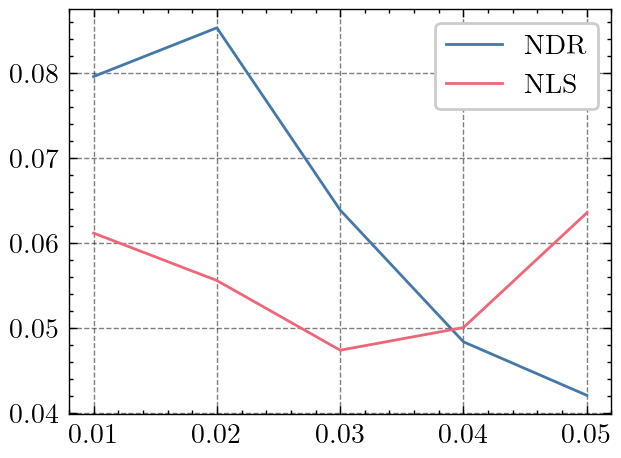

In [7]:
fig = plt.figure(dpi=200)
ax  = fig.add_subplot()
ax.plot(V_CONTROL, ndrs, label='NDR')
ax.plot(V_CONTROL, nlss, label='NLS')
ax.legend()

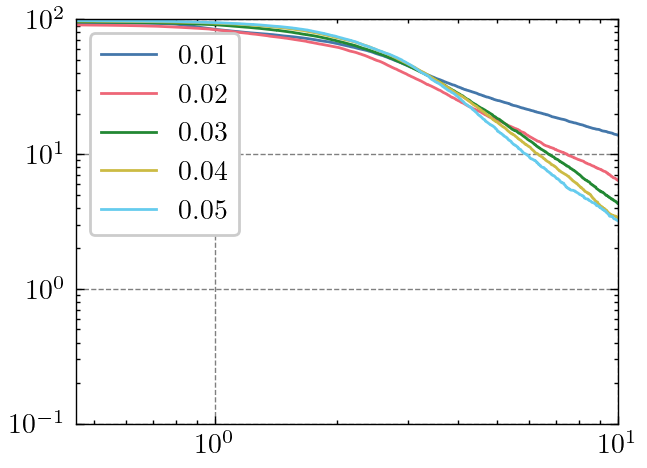

In [11]:
g   = 'AND'
fig = plt.figure(dpi=200)
ax  = fig.add_subplot()
for V in V_CONTROL:
    ax.plot(data_a[V][f'{g} Fitness'], data_a[V][f'{g} Fitness Abundance'], label=V)
ax.set_xlim(0.45,10)
ax.set_ylim(0.1,100)
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()

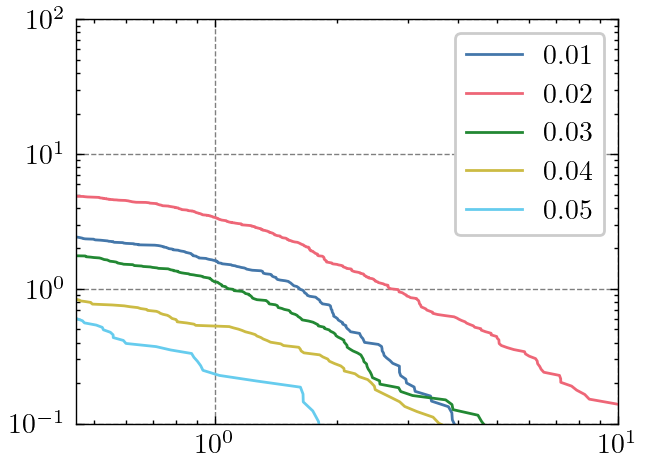

In [12]:
g   = 'NAND'
fig = plt.figure(dpi=200)
ax  = fig.add_subplot()
for V in V_CONTROL:
    ax.plot(data_a[V][f'{g} Fitness'], data_a[V][f'{g} Fitness Abundance'], label=V)
ax.set_xlim(0.45,10)
ax.set_ylim(0.1,100)
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()

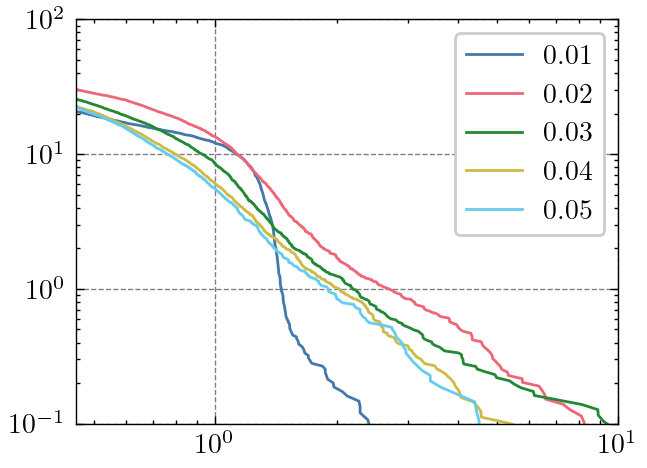

In [13]:
g   = 'XOR'
fig = plt.figure(dpi=200)
ax  = fig.add_subplot()
for V in V_CONTROL:
    ax.plot(data_a[V][f'{g} Fitness'], data_a[V][f'{g} Fitness Abundance'], label=V)
ax.set_xlim(0.45,10)
ax.set_ylim(0.1,100)
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()